# Prediction of O Negative blood stock for next month

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data pre-processing

In [ ]:
#Load CSV file.
df = pd.read_csv('/content/lri_stock_(july23-july24).csv')

#Display first five rows of the dataset.
df.head()

,Date,O Pos,O Neg,A Pos,A Neg,B Pos,B Neg,AB Pos,AB Neg,Total,Unnamed: 10
0,31-Jul-24,46,42,56,16,18,0,7,0,185,NaN
1,30-Jul-24,48,58,34,22,13,2,6,2,185,NaN
2,29-Jul-24,48,61,52,24,18,0,7,3,213,NaN
3,26-Jul-24,62,63,59,26,20,3,3,2,238,NaN
4,25-Jul-24,77,62,45,24,24,2,8,2,244,NaN


In [ ]:
#Information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         304 non-null    object 
 1   O Pos        304 non-null    int64  
 2   O Neg        304 non-null    int64  
 3   A Pos        304 non-null    int64  
 4   A Neg        304 non-null    int64  
 5   B Pos        304 non-null    int64  
 6   B Neg        304 non-null    int64  
 7   AB Pos       304 non-null    int64  
 8   AB Neg       304 non-null    int64  
 9   Total        304 non-null    int64  
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(1), int64(9), object(1)
memory usage: 26.2+ KB


In [ ]:
#Convert "Date" attribute to datetime format.
df['Date Of Inventory Levels'] = pd.to_datetime(df['Date'])

<ipython-input-25-132665ed6237>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Of Inventory Levels'] = pd.to_datetime(df['Date'])


In [ ]:
#Drop unnecessary columns.
df = df.drop(columns=['Unnamed: 10', 'Date', 'O Pos', 'A Pos', 'A Neg', 'B Pos', 'B Neg', 'AB Pos', 'AB Neg', 'Total'], errors='ignore')

In [ ]:
#Check for missing values.
print(df.isnull().sum())

O Neg    0
dtype: int64


In [ ]:
#Reorder columns.
new_order = ['Date Of Inventory Levels', 'O Neg']
df = df[new_order]

In [ ]:
#Display first 5 rows of cleansed dataset.
df.head()

,Date Of Inventory Levels,O Neg
0,2024-07-31,42
1,2024-07-30,58
2,2024-07-29,61
3,2024-07-26,63
4,2024-07-25,62


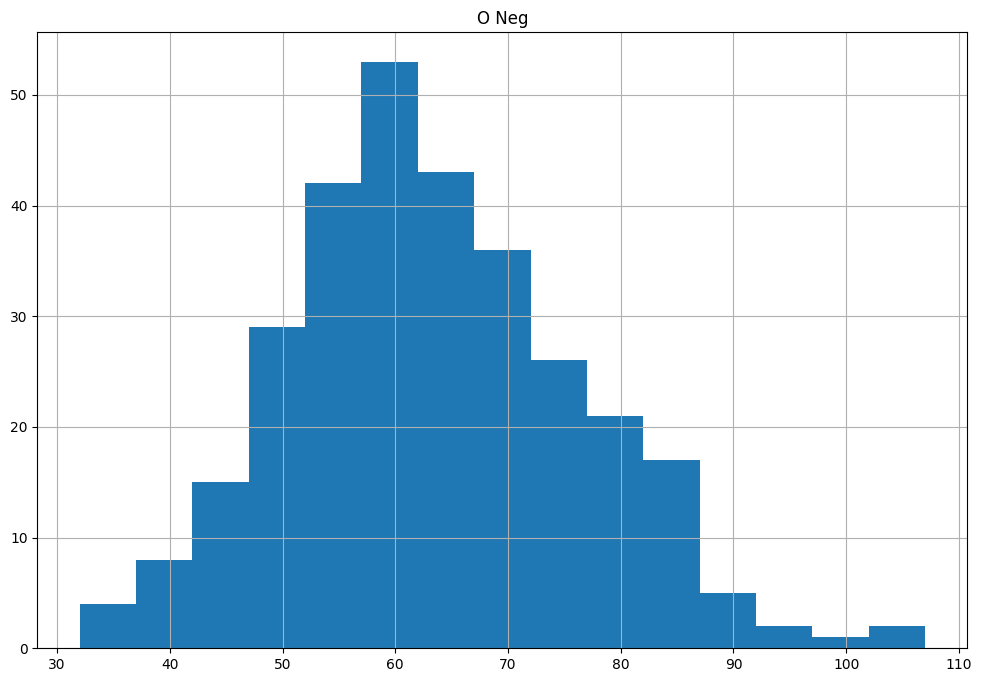

In [ ]:
#View distrubition of data using a histogram.

#Skewed data can make it harder for ML algorithims to detect patterns.

columns_to_plot = ['O Neg']

df[columns_to_plot].hist(bins=15, figsize=(12, 8))

plt.show()

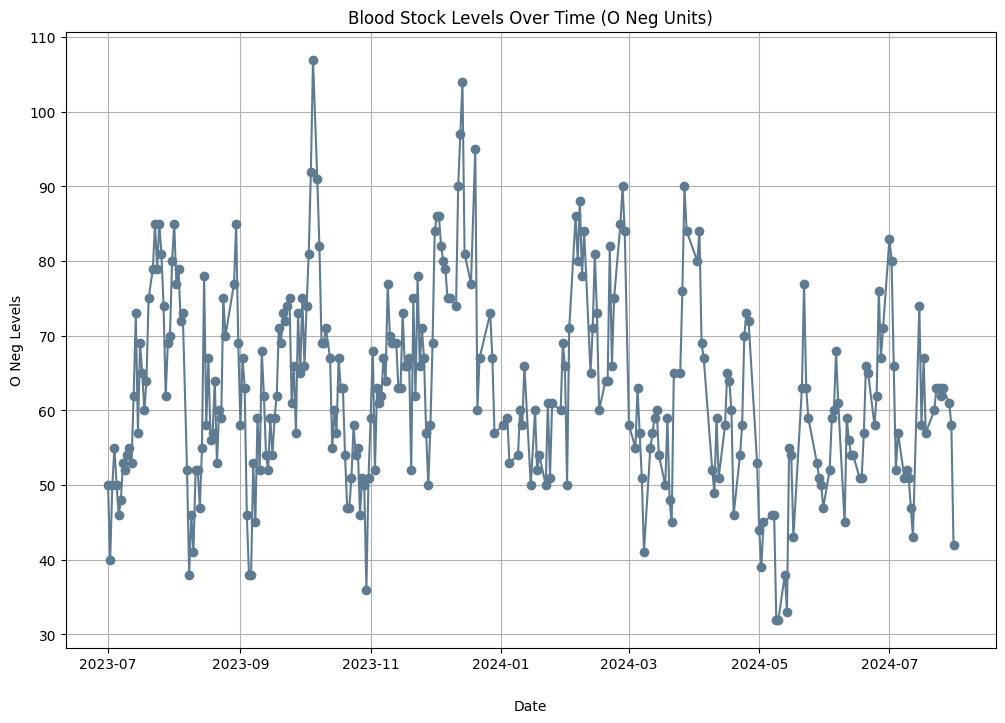

In [ ]:
#Visualising data overtime.
plt.figure(figsize=(12, 8))
plt.plot(df['Date Of Inventory Levels'], df['O Neg'], marker='o', linestyle='-', color='#5e7b91')
plt.title('Blood Stock Levels Over Time (O Neg Units)')
plt.xlabel('Date', labelpad=20)
plt.ylabel('O Neg Levels')
plt.grid(True)
plt.show()

In [ ]:
#Rename columns to 'ds'(datestamp) & 'y'(target variable).
df = df.rename(columns={'Date Of Inventory Levels': 'ds', 'O Neg': 'y'})
df.head()

,ds,y
0,2024-07-31,42
1,2024-07-30,58
2,2024-07-29,61
3,2024-07-26,63
4,2024-07-25,62


# 2. Model

In [ ]:
#Create and train the model.
m = Prophet(interval_width=0.95, yearly_seasonality=10)
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnvyqop7v/a72ps3it.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnvyqop7v/r3btzg0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9243', 'data', 'file=/tmp/tmpnvyqop7v/a72ps3it.json', 'init=/tmp/tmpnvyqop7v/r3btzg0y.json', 'output', 'file=/tmp/tmpnvyqop7v/prophet_modelnnb93ul7/prophet_model-20240828091651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:16:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:16:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# 3. EDA/Results

In [ ]:
#Make predictions.
future = m.make_future_dataframe(periods=31)
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
330,2024-08-27,60.966556,40.110666,79.527328,60.965999,60.967097,-0.829582,-0.829582,-0.829582,1.205163,1.205163,1.205163,-2.034745,-2.034745,-2.034745,0.0,0.0,0.0,60.136975
331,2024-08-28,60.958726,42.390379,78.144378,60.958141,60.959287,-0.321888,-0.321888,-0.321888,1.966477,1.966477,1.966477,-2.288365,-2.288365,-2.288365,0.0,0.0,0.0,60.636838
332,2024-08-29,60.950895,39.812623,79.674155,60.950276,60.951484,-1.335001,-1.335001,-1.335001,1.296507,1.296507,1.296507,-2.631508,-2.631508,-2.631508,0.0,0.0,0.0,59.615894
333,2024-08-30,60.943065,36.276606,74.157894,60.942418,60.943675,-4.882843,-4.882843,-4.882843,-1.827761,-1.827761,-1.827761,-3.055082,-3.055082,-3.055082,0.0,0.0,0.0,56.060222
334,2024-08-31,60.935234,39.065126,76.443543,60.934570,60.935866,-2.747222,-2.747222,-2.747222,0.799210,0.799210,0.799210,-3.546432,-3.546432,-3.546432,0.0,0.0,0.0,58.188012


In [ ]:
#'yhat' values are our predicted values.

#Predicted values for the next 31 days.
forecast[['ds','yhat']].tail(31)

,ds,yhat
304,2024-08-01,63.109108
305,2024-08-02,59.136145
306,2024-08-03,60.933567
307,2024-08-04,58.634998
308,2024-08-05,55.884357
309,2024-08-06,59.164338
310,2024-08-07,59.360060
311,2024-08-08,58.224490
312,2024-08-09,54.741707
313,2024-08-10,57.120680


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


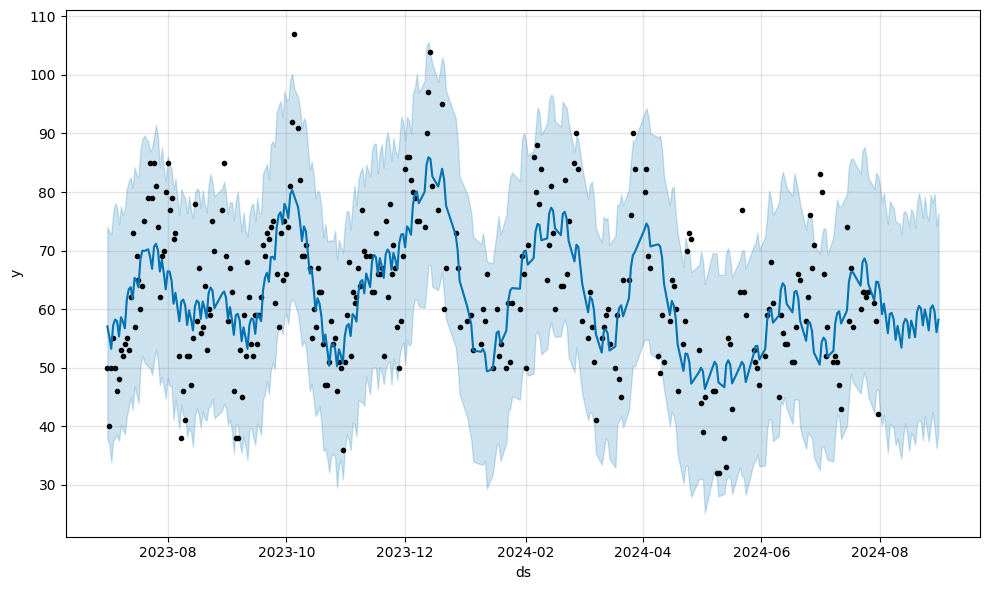

In [ ]:
forecast_plot = m.plot(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

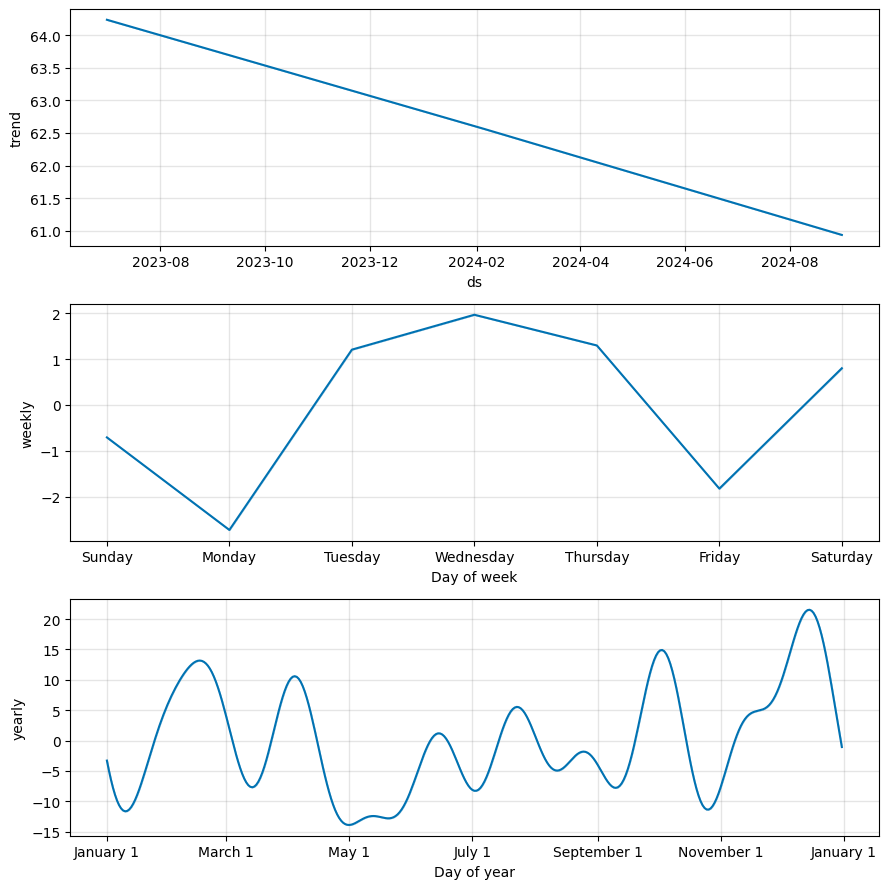

In [ ]:
forecast_components = m.plot_components(forecast)

# References

‌McKinney, W. (2022). Python for Data Analysis. ‘O’Reilly Media, Inc.’

Prophet. (2017). Quick Start. [online] Available at: https://facebook.github.io/prophet/docs/quick_start.html.